In [1]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import math

In [2]:
l=math.exp(0.5)*800**2+((6.67*10**(-4))*(math.exp(5)-1)*0.0138*(200**2)*(0.84**2)*(635**2)/2.87**5)
math.sqrt(l)

1065.1225704123076

$Pwf2=exp(s)*Phf2+(6.67*10**-4*(exp(s)-1)*f*Q2*Z2*T2)/Di**5*cosx$

$skin=0.0375*rg*L*cosx/ZT$

$f=0.01750/Di**0.224$    if Di<4.277 inch


$f=0.01603/Di**0.164$    if Di>4.277 inch

In [3]:
Di=float(input('enter value for Di='))

enter value for Di=2.87


In [4]:
if Di>=4.277:
    f=0.01750/Di**0.224
    print(f)
else:
    f=0.01603/Di**0.164
    print(f)

0.01348468765254794


In [5]:
sp_gr_gas=float(input('enter sp_gr_gas='))
Lenght_well=float(input('enter Lenght_well='))
x=float(input('enter inclination angle of well='))
comp_factor=float(input('enter comp_factor='))
avg_temp=float(input('enter avg_temp='))


enter sp_gr_gas=0.87
enter Lenght_well=10000
enter inclination angle of well=0
enter comp_factor=0.87
enter avg_temp=635


In [6]:
skin=0.0375*sp_gr_gas*Lenght_well*math.cos(x)/(comp_factor*avg_temp)
skin

0.5905511811023622

In [11]:
Q=float(input('enter the flow rate='))
surface_pre=float(input('surface pressure='))

enter the flow rate=2000
surface pressure=800


In [12]:
Pwf=math.exp(skin)*surface_pre**2+(6.67*10**-4*(math.exp(skin)-1)*f*Q**2*comp_factor**2*avg_temp**2)/Di**5*math.cos(x)
pwf1=math.sqrt(Pwf)
pwf1

1095.7108356383733

In [14]:
pwf=[]
n = int(input("Enter number of pwf's : ")) 
for i in range(0, n): 
    ele= int(input()) 
    pwf.append(ele)
print(pwf)

Enter number of pwf's : 4
1100
1500
2000
2500
[1100, 1500, 2000, 2500]


In [15]:
q_flow=[]
for i in range(0,len(pwf)):
    q2=(pwf[i]**2-(math.exp(skin)*surface_pre**2))*2.87**5/(6.67*10**-4*(math.exp(skin)-1)*0.0138*0.84**2*635**2)
    q=math.sqrt(q2)
    q_flow.append(q)
q_flow

[2250.0349526188675,
 10056.004586889332,
 16209.984950159786,
 21693.016450615272]

In [28]:
output=pd.DataFrame([pwf,q_flow]).transpose()
output.columns=['pwf','q_flow']
q_flow=output.q_flow/1000

In [29]:
output

,pwf,q_flow
0,1100.0,2250.034953
1,1500.0,10056.004587
2,2000.0,16209.984950
3,2500.0,21693.016451


In [39]:
a=pd.DataFrame([Q,pwf1]).transpose()
a.columns=['q_flow','pwf']
a

,q_flow,pwf
0,2000.0,1095.710836


In [41]:
pd.concat([output,a])

,pwf,q_flow
0,1100.000000,2250.034953
1,1500.000000,10056.004587
2,2000.000000,16209.984950
3,2500.000000,21693.016451
0,1095.710836,2000.000000


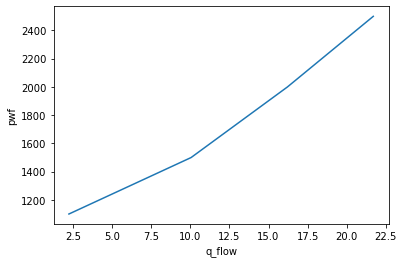

In [43]:
import seaborn as sns
sns.lineplot(data=output,y=pwf,x=q_flow)
plt.xlabel('q_flow')
plt.ylabel('pwf')
plt.show()